## SRFP AQI data extra plots for Lucknow city

In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

# Use seaborn style defaults and set default figure size
plt.style.use('seaborn-pastel')
sns.set_theme(style="whitegrid", color_codes=True)

In [2]:
from functions import rplot, qqplot

In [3]:
dfmod = pd.read_csv('data/lucknow_mod.csv')
dfobs = pd.read_csv('data/lucknow_obs.csv')

In [4]:
dfmod['datetime'] = pd.to_datetime(dfmod.date) + pd.to_timedelta(dfmod.hour)
dfobs['datetime'] = pd.to_datetime(dfobs.date) + pd.to_timedelta(dfobs.hour)

In [5]:
dfmod = dfmod.drop(['date', 'hour'], axis=1)
dfobs = dfobs.drop(['date', 'hour'], axis=1)

In [6]:
dfmod = dfmod.set_index(dfmod.datetime)
dfobs = dfobs.set_index(dfobs.datetime)

In [7]:
# Do interpolatoin of the observed data

dfobs = dfobs.interpolate(method = 'time')

In [8]:
dfobs.isna().sum()

obs_PM2.5          0
obs_PM2.5_stdev    0
obs_PM10           0
obs_PM10_stdev     0
datetime           0
dtype: int64

In [9]:
df = pd.concat([dfmod, dfobs], axis=1)

In [10]:
dfnov = df.loc["2020-11-01":"2020-11-30"]
dfdec = df.loc["2020-12-01":"2020-12-31"]
dfjan = df.loc["2021-01-01":"2021-01-31"]

### Q-Q plot

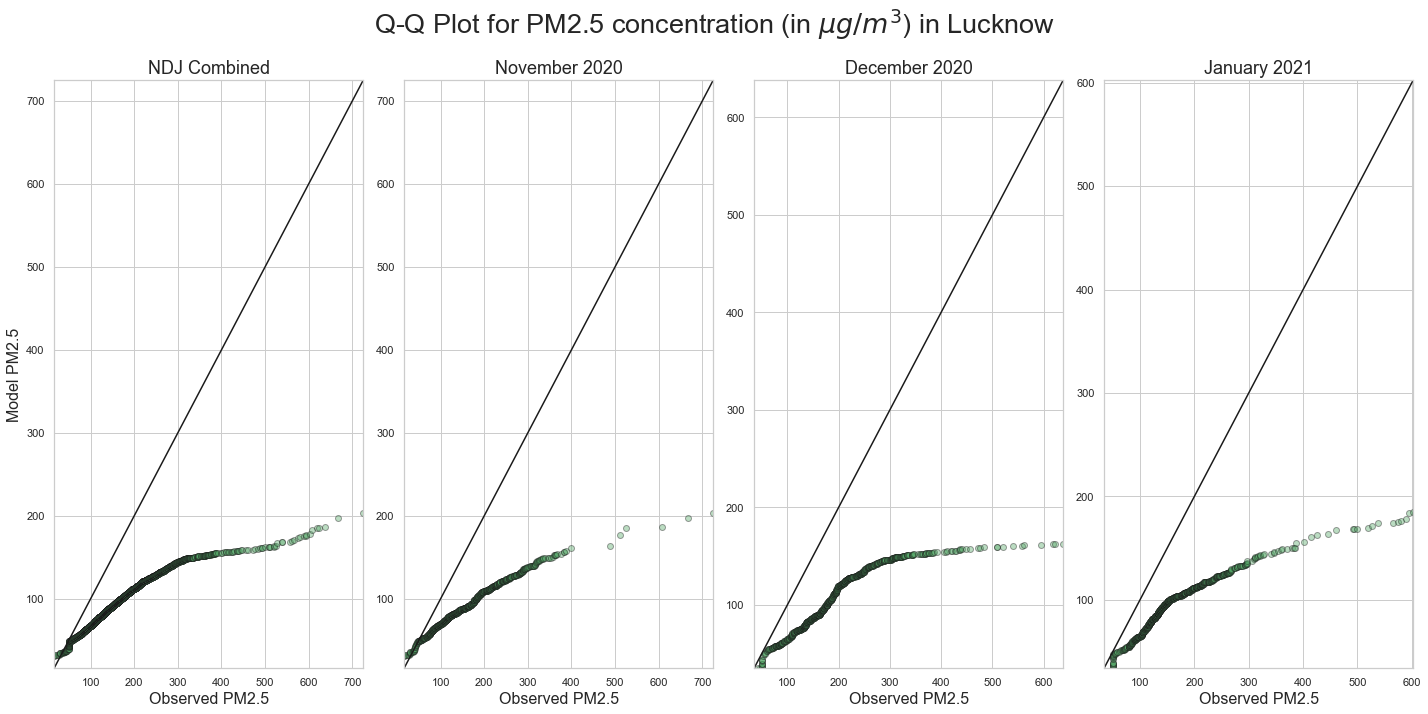

In [11]:
# Q-Q plot for PM2.5 concentration

fig = plt.figure(figsize=(20,10))

plt.subplot(141)
qqplot.plot(df['obs_PM2.5'], df['mod_PM2.5'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
plt.ylabel('Model PM2.5', fontsize=16)
plt.title('NDJ Combined',fontsize=18)

plt.subplot(142)
qqplot.plot(dfnov['obs_PM2.5'], dfnov['mod_PM2.5'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('November 2020', fontsize=18)

plt.subplot(143)
qqplot.plot(dfdec['obs_PM2.5'], dfdec['mod_PM2.5'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('December 2020', fontsize=18)

plt.subplot(144)
qqplot.plot(dfjan['obs_PM2.5'], dfjan['mod_PM2.5'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('January 2021', fontsize=18)

fig.suptitle('Q-Q Plot for PM2.5 concentration (in $\mu g/m^3$) in Lucknow', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/qqplot.plot25.png')

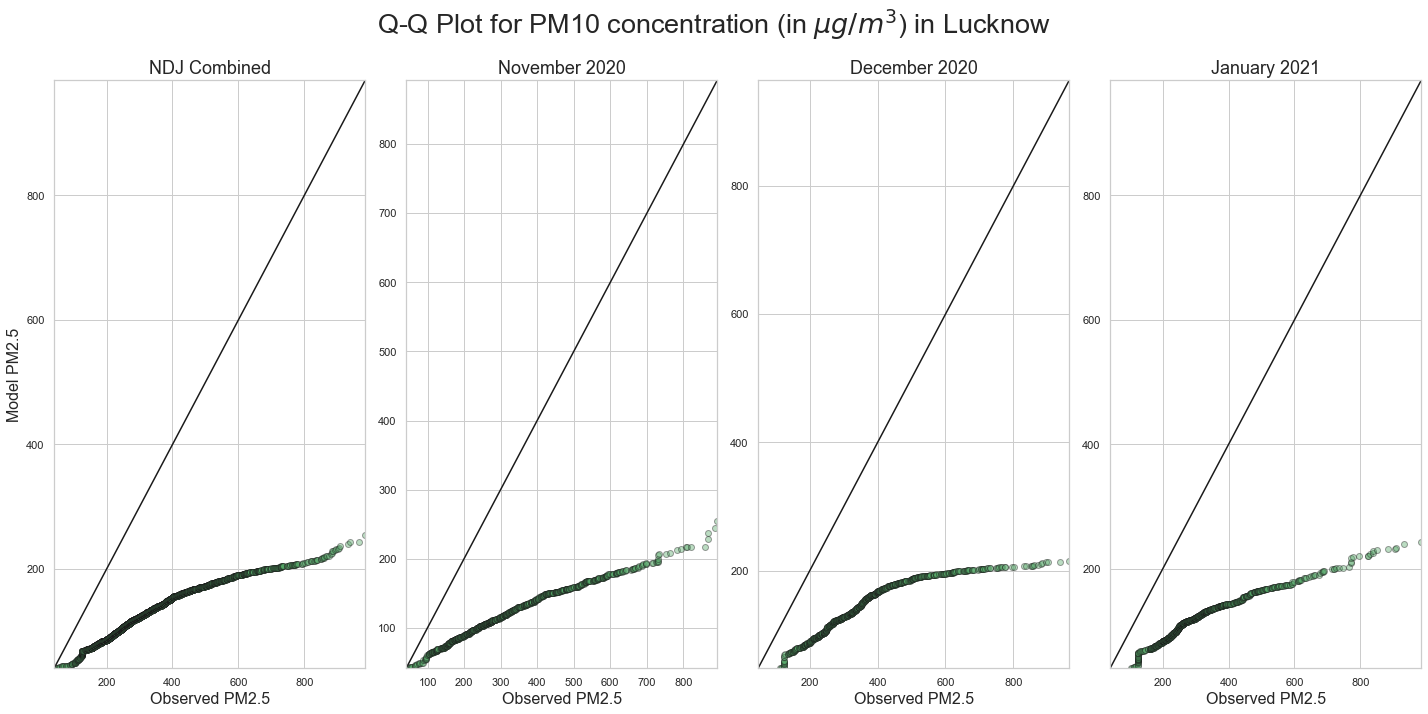

In [12]:
# Q-Q plot for PM10 concentration

fig = plt.figure(figsize=(20,10))

plt.subplot(141)
qqplot.plot(df['obs_PM10'], df['mod_PM10'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
plt.ylabel('Model PM2.5', fontsize=16)
plt.title('NDJ Combined',fontsize=18)

plt.subplot(142)
qqplot.plot(dfnov['obs_PM10'], dfnov['mod_PM10'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('November 2020', fontsize=18)

plt.subplot(143)
qqplot.plot(dfdec['obs_PM10'], dfdec['mod_PM10'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('December 2020', fontsize=18)

plt.subplot(144)
qqplot.plot(dfjan['obs_PM10'], dfjan['mod_PM10'], c='g', alpha=0.4, edgecolor='k', rug=False)
plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('January 2021', fontsize=18)

fig.suptitle('Q-Q Plot for PM10 concentration (in $\mu g/m^3$) in Lucknow', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/qqplot.plot10.png')

### Scatter - Correlation Plot

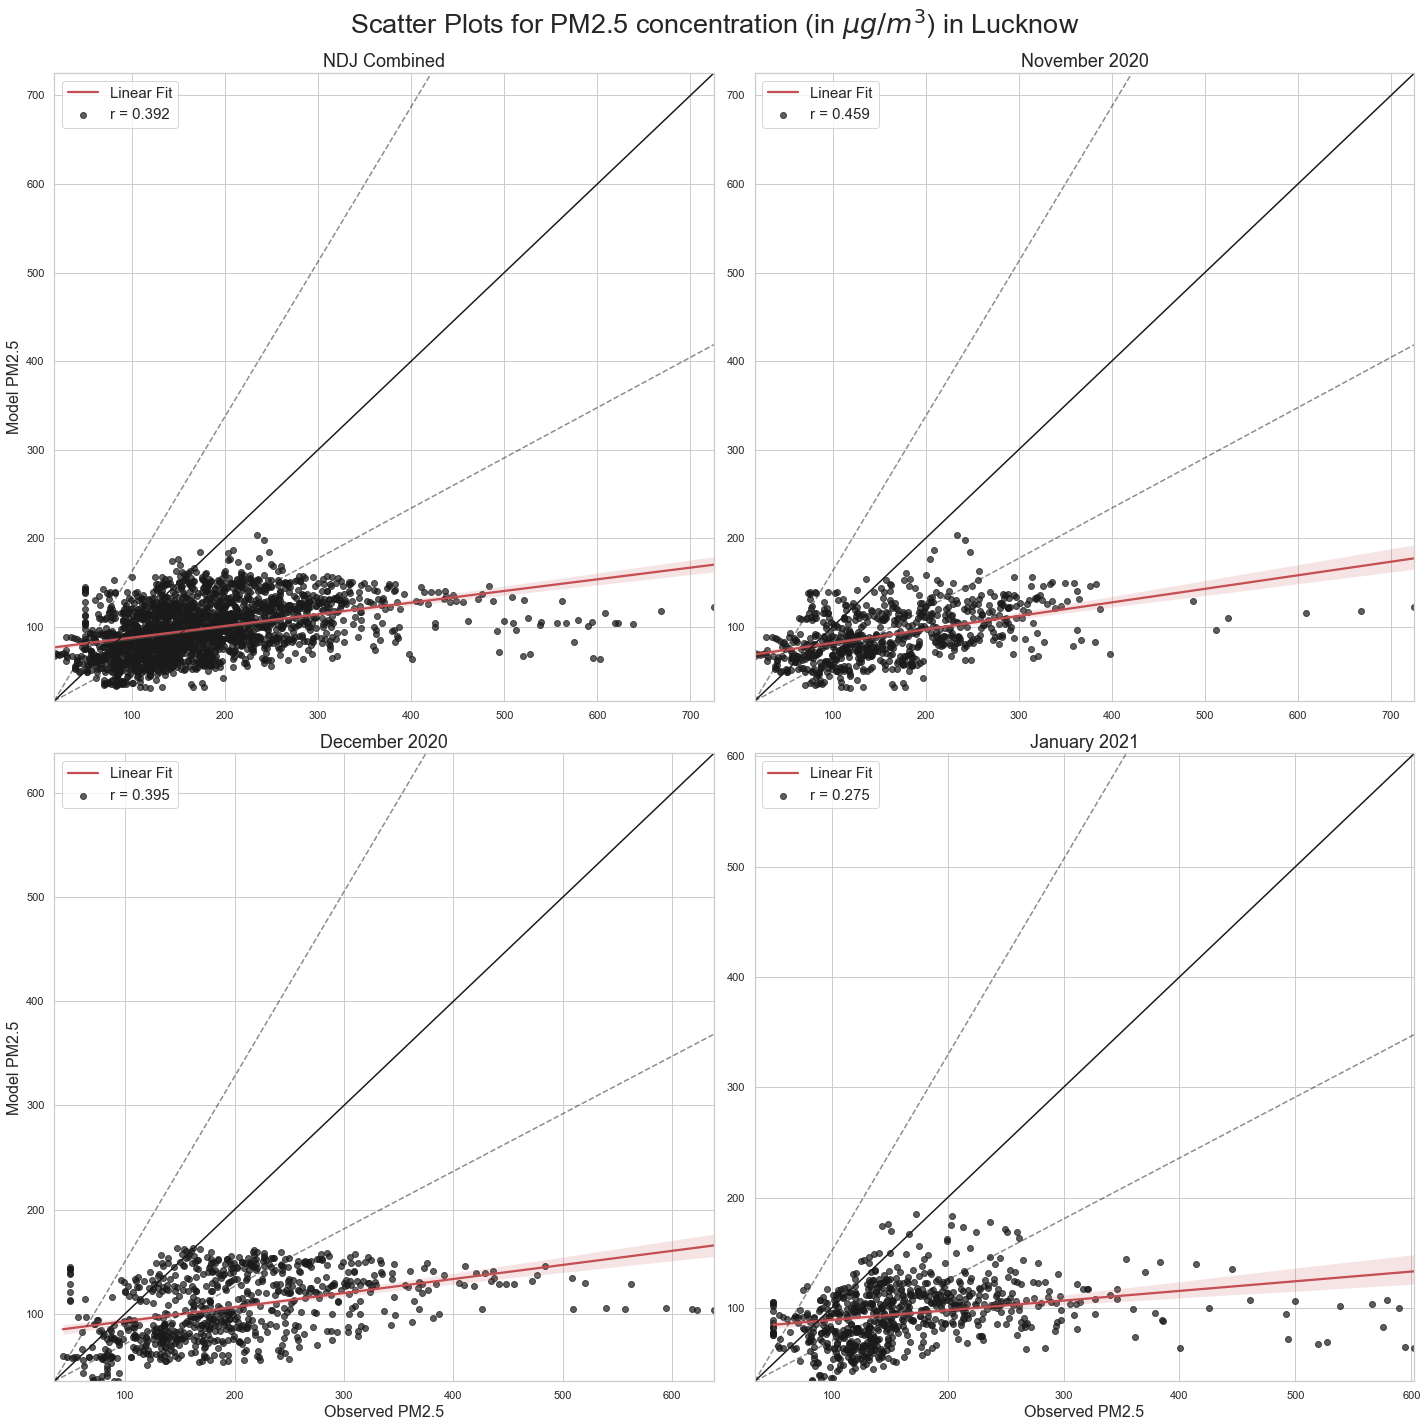

In [13]:
# Scatter-Correlation plot for PM2.5 concentration

fig = plt.figure(figsize=(20,20))

plt.subplot(221)
rplot.plot(df, df['obs_PM2.5'], df['mod_PM2.5'], color='k', alpha=0.7)
# plt.xlabel('Observed PM2.5', fontsize=16)
plt.ylabel('Model PM2.5', fontsize=16)
plt.title('NDJ Combined',fontsize=18)

plt.subplot(222)
rplot.plot(dfnov, dfnov['obs_PM2.5'], dfnov['mod_PM2.5'], color='k', alpha=0.7)
# plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('November 2020', fontsize=18)

plt.subplot(223)
rplot.plot(dfdec, dfdec['obs_PM2.5'], dfdec['mod_PM2.5'], color='k', alpha=0.7)
plt.xlabel('Observed PM2.5', fontsize=16)
plt.ylabel('Model PM2.5', fontsize=16)
plt.title('December 2020', fontsize=18)

plt.subplot(224)
rplot.plot(dfdec, dfjan['obs_PM2.5'], dfjan['mod_PM2.5'], color='k', alpha=0.7)
plt.xlabel('Observed PM2.5', fontsize=16)
# plt.ylabel('Model PM2.5', fontsize=16)
plt.title('January 2021', fontsize=18)

fig.suptitle('Scatter Plots for PM2.5 concentration (in $\mu g/m^3$) in Lucknow', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/rplot.plot25.png')

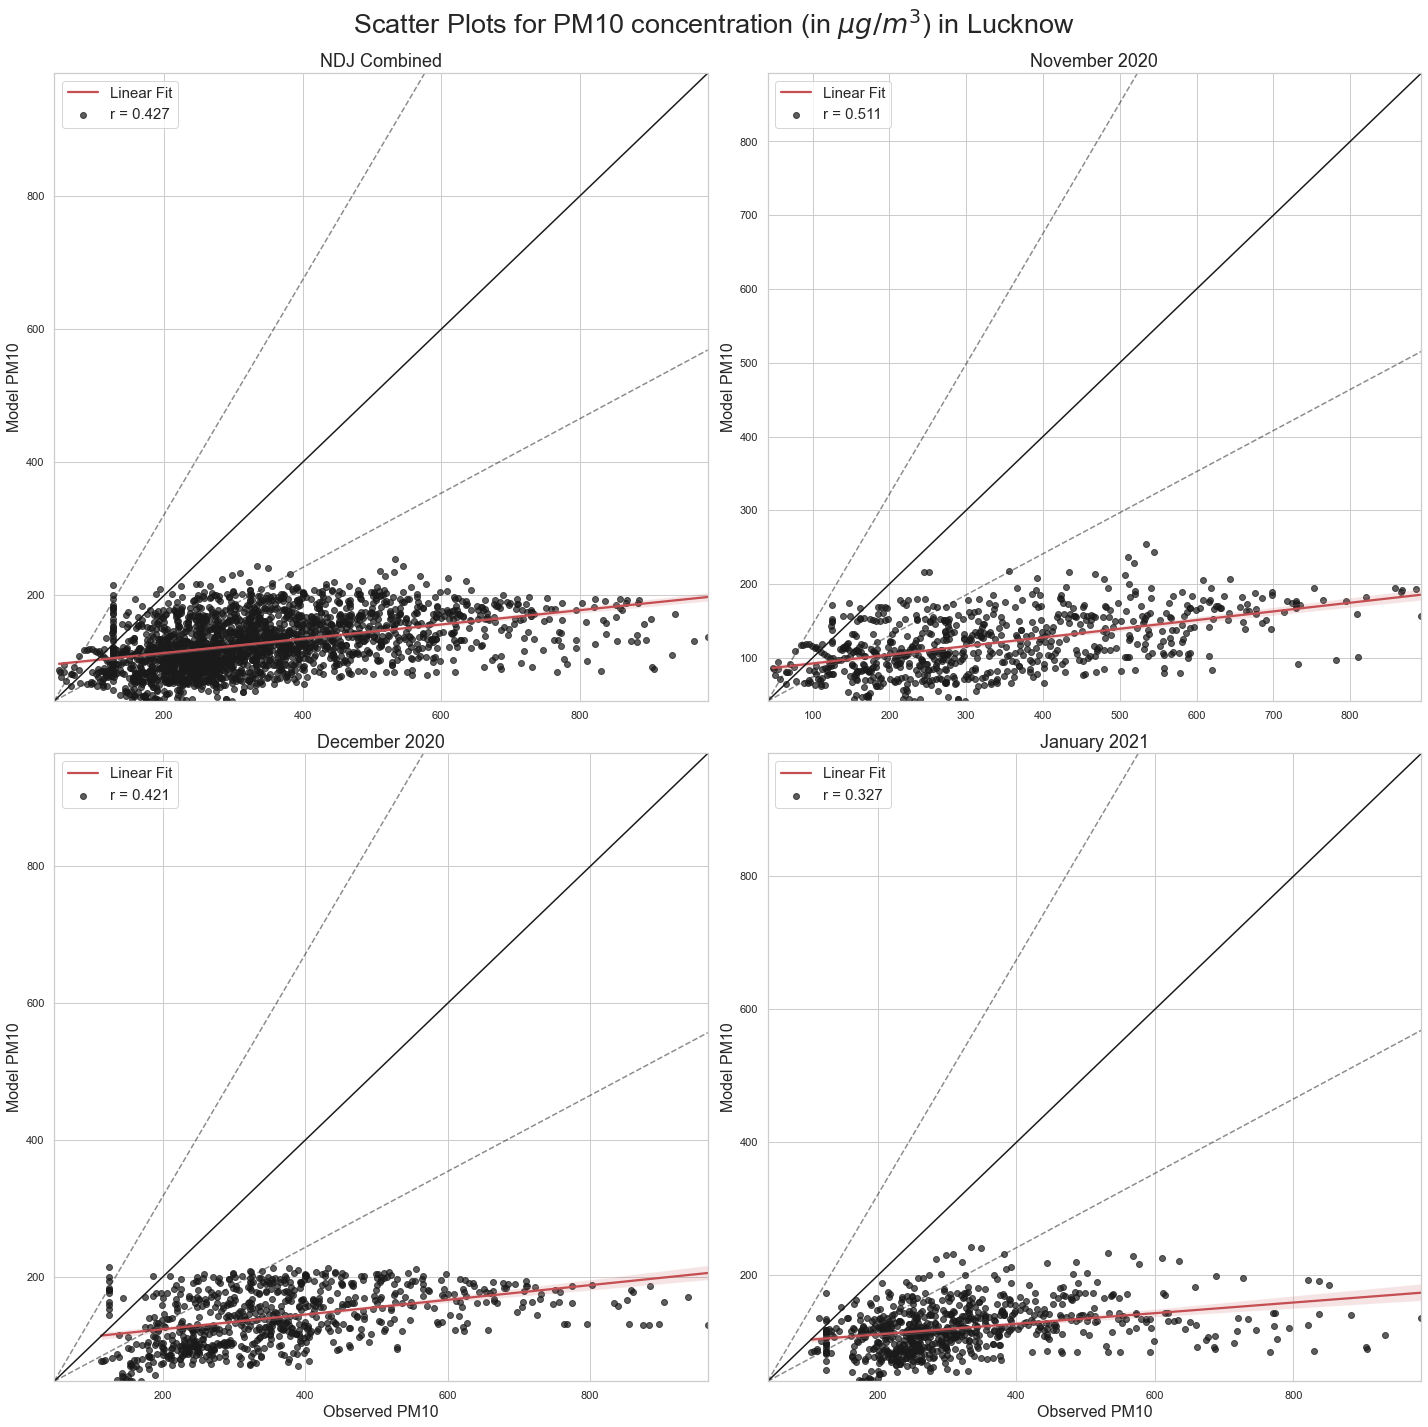

In [14]:
# Scatter-Correlation plot for PM10 concentration

fig = plt.figure(figsize=(20,20))

plt.subplot(221)
rplot.plot(df, df['obs_PM10'], df['mod_PM10'], color='k', alpha=0.7)
# plt.xlabel('Observed PM10', fontsize=16)
plt.ylabel('Model PM10', fontsize=16)
plt.title('NDJ Combined',fontsize=18)

plt.subplot(222)
rplot.plot(dfnov, dfnov['obs_PM10'], dfnov['mod_PM10'], color='k', alpha=0.7)
# plt.xlabel('Observed PM10', fontsize=16)
plt.ylabel('Model PM10', fontsize=16)
plt.title('November 2020', fontsize=18)

plt.subplot(223)
rplot.plot(dfdec, dfdec['obs_PM10'], dfdec['mod_PM10'], color='k', alpha=0.7)
plt.xlabel('Observed PM10', fontsize=16)
plt.ylabel('Model PM10', fontsize=16)
plt.title('December 2020', fontsize=18)

plt.subplot(224)
rplot.plot(dfdec, dfjan['obs_PM10'], dfjan['mod_PM10'], color='k', alpha=0.7)
plt.xlabel('Observed PM10', fontsize=16)
plt.ylabel('Model PM10', fontsize=16)
plt.title('January 2021', fontsize=18)

fig.suptitle('Scatter Plots for PM10 concentration (in $\mu g/m^3$) in Lucknow', fontsize=27, y=0.99)
fig.tight_layout()
plt.savefig('./images/rplot.plot10.png')